# Correctness classifier

**Task:** Draw a house

**Result:** Not being able to train properly, we have too little images 

Best accurary: 0.8333%

main source: Keras documentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt

In [10]:
# dimensions of our images.
img_width, img_height = 520, 292

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 15
nb_validation_samples = 7
epochs = 50
batch_size = 2

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

## Model definition
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Generators and augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.5,
    zoom_range=0.3,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(-0.4,0.4),
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

## Training
callback_es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50)
callback_cp = ModelCheckpoint('models/correctnes_classifier_house.ht', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[callback_es, callback_cp])

Found 30 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Epoch 1/50
7/7 [==============================] - ETA: 0s - loss: 0.7157 - accuracy: 0.5714
Epoch 00001: val_accuracy improved from -inf to 0.16667, saving model to models/correctnes_classifier_house.ht
INFO:tensorflow:Assets written to: models/correctnes_classifier_house.ht/assets
7/7 [==============================] - 3s 463ms/step - loss: 0.7157 - accuracy: 0.5714 - val_loss: 0.7058 - val_accuracy: 0.1667
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 0.6992 - accuracy: 0.3571
Epoch 00002: val_accuracy improved from 0.16667 to 0.50000, saving model to models/correctnes_classifier_house.ht
INFO:tensorflow:Assets written to: models/correctnes_classifier_house.ht/assets
7/7 [==============================] - 4s 540ms/step - loss: 0.6992 - accuracy: 0.3571 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.5000
E

Epoch 29/50
7/7 [==============================] - ETA: 0s - loss: 0.7123 - accuracy: 0.5000
Epoch 00029: val_accuracy did not improve from 0.66667
7/7 [==============================] - 2s 261ms/step - loss: 0.7123 - accuracy: 0.5000 - val_loss: 0.7046 - val_accuracy: 0.6667
Epoch 30/50
7/7 [==============================] - ETA: 0s - loss: 0.7343 - accuracy: 0.3571
Epoch 00030: val_accuracy did not improve from 0.66667
7/7 [==============================] - 2s 285ms/step - loss: 0.7343 - accuracy: 0.3571 - val_loss: 0.7520 - val_accuracy: 0.5000
Epoch 31/50
7/7 [==============================] - ETA: 0s - loss: 0.8234 - accuracy: 0.6429
Epoch 00031: val_accuracy did not improve from 0.66667
7/7 [==============================] - 2s 272ms/step - loss: 0.8234 - accuracy: 0.6429 - val_loss: 0.9388 - val_accuracy: 0.3333
Epoch 32/50
7/7 [==============================] - ETA: 0s - loss: 0.7240 - accuracy: 0.5000
Epoch 00032: val_accuracy did not improve from 0.66667
7/7 [================

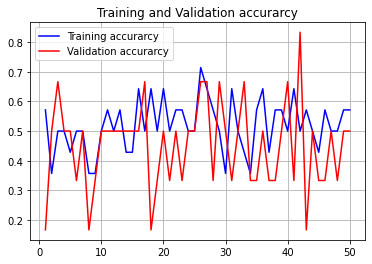

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation acc
plt.grid(True)
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.savefig('assets/output_training_acc.svg')